In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import random

%matplotlib inline

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
print(data.columns)
data.info()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Loading the dataset and separate into training/test ( X/y)
x_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

print (data.shape)
print (x_data.shape)
print (y_data.shape)
print (x_data)

(284807, 31)
(284807, 30)
(284807,)
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.2395

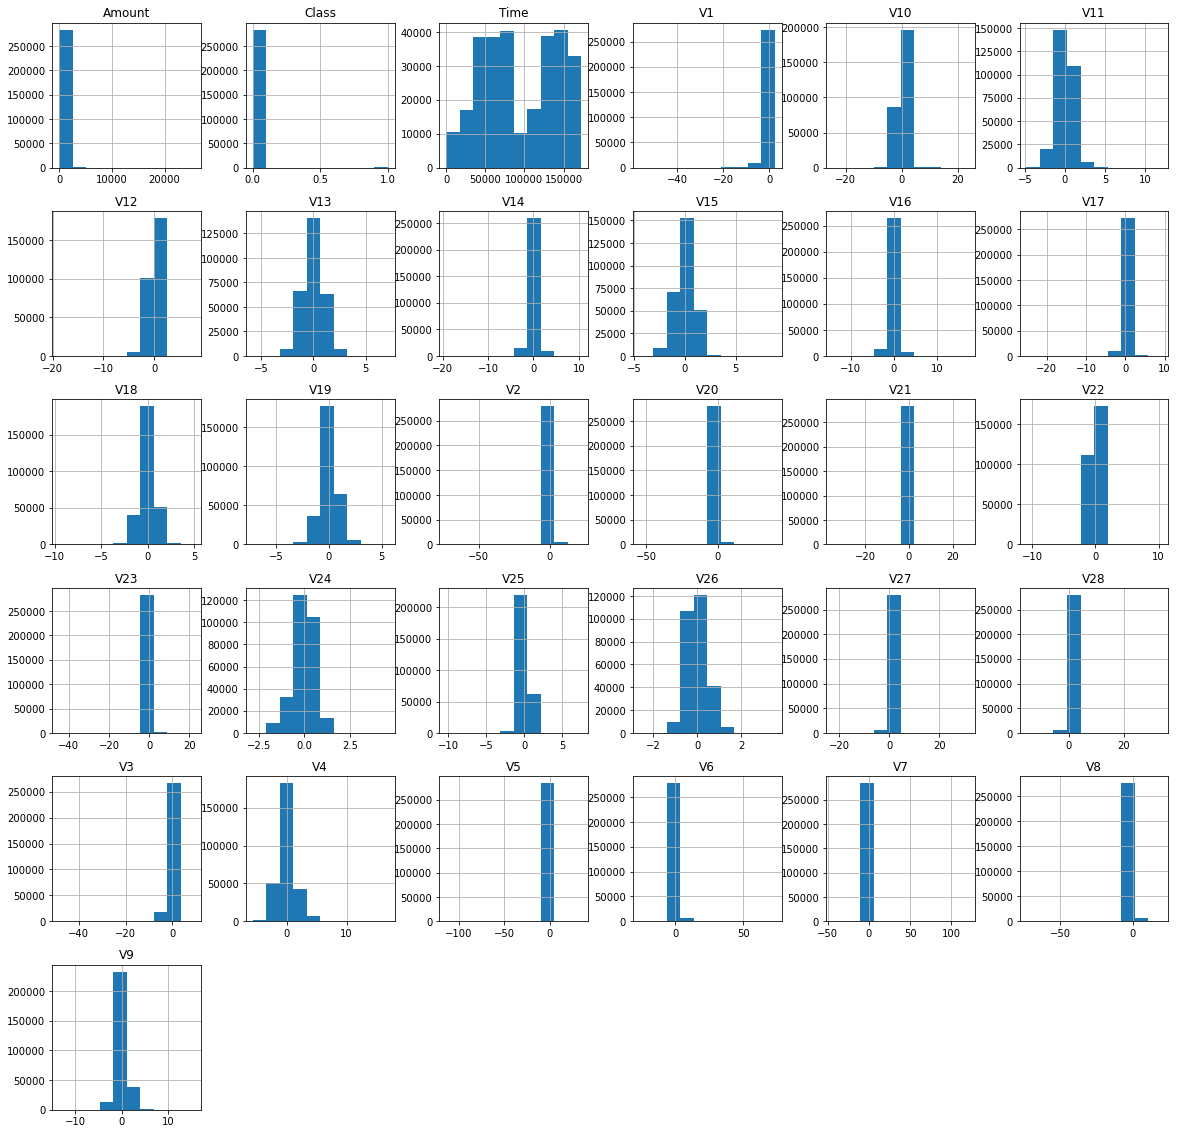

In [6]:
# Plot for each variable in histogram. 
data.hist(figsize=(20,20))
mp.show()

Normal transactions count:  284315
Fraudulent transactions count:  492


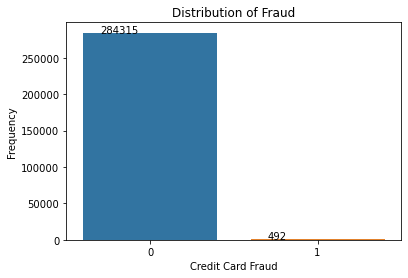

In [7]:

import seaborn as sns
ax = sns.countplot(x="Class", data=data)
mp.title('Distribution of Fraud')
mp.xlabel('Credit Card Fraud')
mp.ylabel('Frequency')
print('Normal transactions count: ', data['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', data['Class'].value_counts().values[1])

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


In [8]:
#Time data is most likely not useful at all
# Let's drop the amount column, and create its own comparison
x_data = x_data.drop('Time', 1)
x_data = x_data.drop('Amount', 1)

x_data_part_one = x_data.drop('V15', 1).drop('V16', 1).drop('V17', 1) \
    .drop('V18', 1).drop('V19', 1).drop('V20', 1).drop('V21', 1) \
    .drop('V22', 1).drop('V23', 1).drop('V24', 1).drop('V25', 1) \
    .drop('V26', 1).drop('V27', 1).drop('V28', 1)

x_data_part_two = x_data.drop('V1', 1).drop('V2', 1).drop('V3', 1) \
    .drop('V4', 1).drop('V5', 1).drop('V6', 1).drop('V7', 1) \
    .drop('V8', 1).drop('V9', 1).drop('V10', 1).drop('V11', 1) \
    .drop('V12', 1).drop('V13', 1).drop('V14', 1)

In [9]:
# Function to plot all features of normal (max 1000 random)/fraud rows
def plot_features(x_data, is_fraud):
    exs = y_data.loc[y_data == is_fraud]
    if (exs.shape[0] > 1000):
        exs = exs.head(1000)
    mp.figure(figsize=(10, 10))
    for ex in range(exs.shape[0]):
        case = x_data.iloc[exs.index[ex]]
        case.plot(kind = 'line')

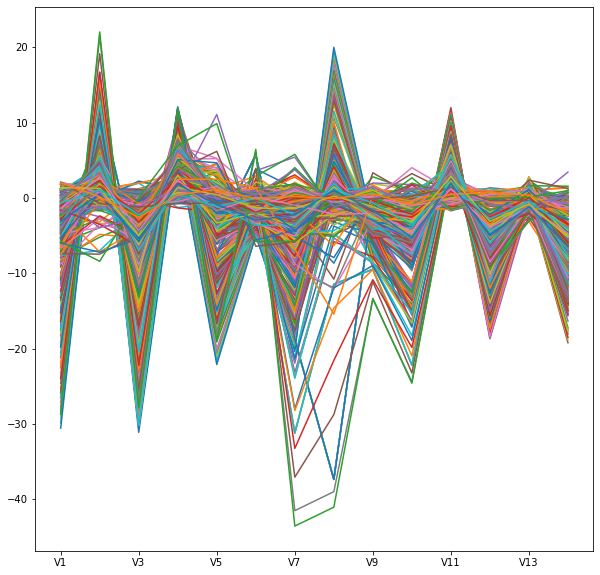

In [10]:
# Plot all the fraud case features in two plots (V1-V14, V15-V28)
plot_features(x_data_part_one, 1)

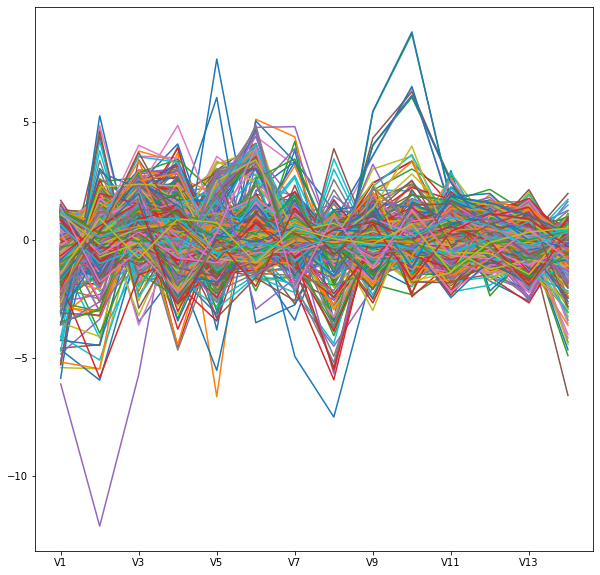

In [11]:
#Plot of features V1-V14 of normal cases
plot_features(x_data_part_one, 0)

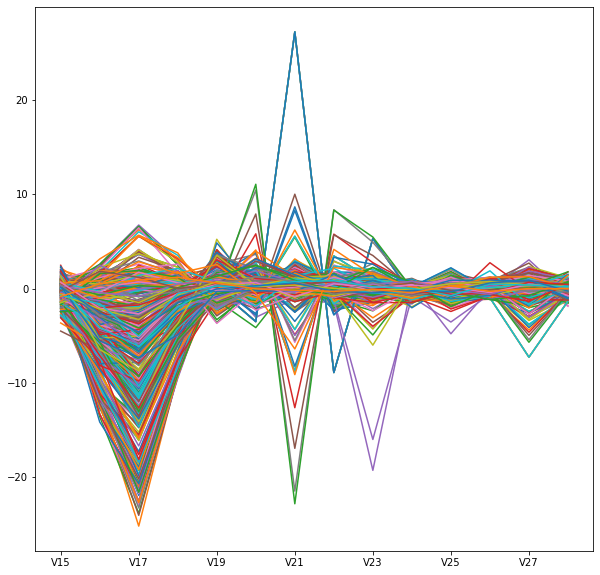

In [12]:
#Plot of features V15-V28 of fraud cases
plot_features(x_data_part_two, 1)

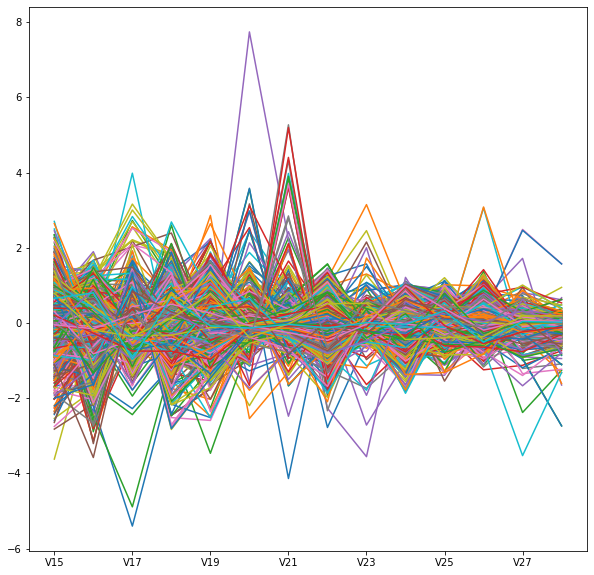

In [13]:
#Plot of features V15-V28 of normal cases
plot_features(x_data_part_two, 0)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#Use logistic regression with SMOTE
#We will be using 20% our data for testing
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [16]:
#Checking shape of dataset after split
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(227845, 31) (227845,)
(56962, 31) (56962,)


In [17]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [18]:
np.bincount(y_train)

array([227448, 227448], dtype=int64)

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


C:\Users\swapna kp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:

from sklearn.metrics import classification_report,accuracy_score ,roc_curve, roc_auc_score,auc
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9838137705838981
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56867
           1       0.09      0.94      0.16        95

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.58     56962
weighted avg       1.00      0.98      0.99     56962

[[55951   916]
 [    6    89]]


In [21]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9603671725253663


Text(0.5, 0, 'False Positive Rate')

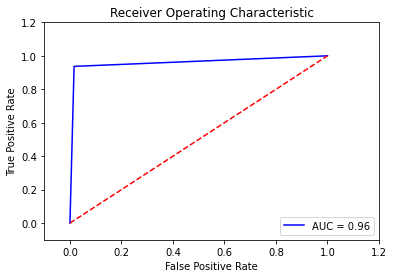

In [26]:
mp.title('Receiver Operating Characteristic')
mp.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
mp.legend(loc='lower right')
mp.plot([0,1],[0,1],'r--')
mp.xlim([-0.1,1.2])
mp.ylim([-0.1,1.2])


mp.ylabel('True Positive Rate')
mp.xlabel('False Positive Rate')